In [1]:
# Multiple horizons MTM analysis
include("/Users/federicoclaudi/Documents/Github/LocomotionControl/analysis/behavior/analysis_fixtures.jl")
include("/Users/federicoclaudi/Documents/Github/LocomotionControl/analysis/behavior/analysis_visuals.jl")

import jcontrol as jc
using Printf

  Activating project at `~/Documents/Github/LocomotionControl/analysis/behavior`


@Info (Main):  Loaded 1021 trials 
  ╰──────────────────────────────────────────────── 


                      Tue, 24 May 2022 10:04:24 
@Info (Main):  After tortuosity analysis, discarded 9.109% of trials | 928

 
  │                trials left 
  ╰──────────────────────────────────────────────── 
                      Tue, 24 May 2022 10:04:27 


# Track creators
Code to create various kinds of tracks for simulations with MCM to crate a dataset for RNN.

## Hairpin

In [2]:
import jcontrol: Track
using NPZ

visually inspect hairpinwith constant width

In [3]:
function showtrack(npyfile; ms=4)
    track = Track(; start_waypoint=4, npyfile=npyfile, const_width=true, track_length=nothing)
    plt = plot(; aspect_ratio=:equal)
    scatter!(track.X[1:400:end], track.Y[1:400:end], marker_z=track.S[1:400:end], label=nothing, ms=ms)
    draw!(track, alpha=0)
    plt
end


function reversetrack(npyfile)
    xy = npzread(npyfile)
    xy = reverse(xy, dims=1)

    destfile = replace(npyfile, ".npy"=>"_reversed.npy")
    @info "Saving reversed track at" destfile
    npzwrite(destfile, xy)
    return destfile
end

function create_track(x, y, name)
    xy = hcat(x, y)
    l = (Int64 ∘ round)(sum(sqrt.(diff(x).^2 .+ diff(y).^2))) * 2

    destfile = "/Users/federicoclaudi/Documents/Github/LocomotionControl/analysis/RNN/tracks/$name.npy"
    @info "Saving track at" destfile
    npzwrite(destfile, xy)
    reverse_npyfile = reversetrack(destfile)
    return destfile, reverse_npyfile, l
end


create_track (generic function with 1 method)

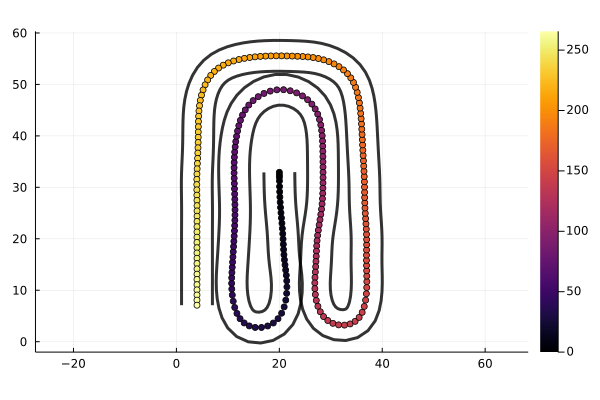

In [4]:
npyfile = "/Users/federicoclaudi/Documents/Github/LocomotionControl/analysis/RNN/tracks/hairpin.npy"
showtrack(npyfile)

save haripin reversed

@Info (Main.reversetrack):  Saving reversed track at 
  │ 
  │ (String)  ▶  destfile = /Users/federicoclaudi/Documents/Github/LocomotionControl/analysis/RNN/tracks/hairpin_reversed.npy 
  ╰──────────────────────────────────────────────── 
                      Tue, 24 May 2022 10:05:30 


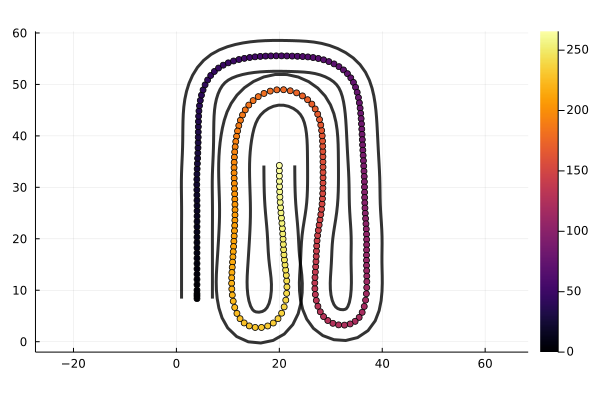

In [5]:
reverse_npyfile = reversetrack(npyfile)
showtrack(reverse_npyfile)

## Circle arena

@Info (Main.create_track):  Saving track at 
  │ 
  │ (String)  ▶  destfile = /Users/federicoclaudi/Documents/Github/LocomotionControl/analysis/RNN/tracks/circle.npy 
  ╰──────────────────────────────────────────────── 
                      Tue, 24 May 2022 10:05:34 
@Info (Main.reversetrack):  Saving reversed track at 
  │ 
  │ (String)  ▶  destfile = /Users/federicoclaudi/Documents/Github/LocomotionControl/analysis/RNN/tracks/circle_reversed.npy 
  ╰──────────────────────────────────────────────── 
                      Tue, 24 May 2022 10:05:34 


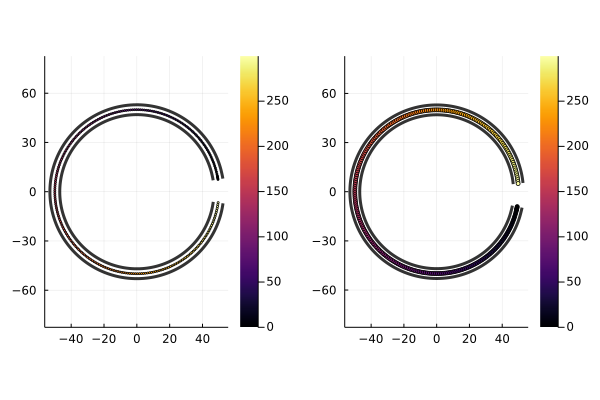

In [6]:
p = 0:.05:2π
x = cos.(p) .* 50
y = sin.(p) .* 50
xy = hcat(x, y)

destfile, reverse_npyfile, l = create_track(x, y, "circle")
p1 = showtrack(destfile; ms=2)
p2 = showtrack(reverse_npyfile; ms=3)
plot(p1, p2)

## Sine track

@Info (Main.create_track):  Saving track at 
  │ 
  │ (String)  ▶  destfile = /Users/federicoclaudi/Documents/Github/LocomotionControl/analysis/RNN/tracks/sine.npy 
  ╰──────────────────────────────────────────────── 
                      Tue, 24 May 2022 10:05:41 
@Info (Main.reversetrack):  Saving reversed track at 
  │ 
  │ (String)  ▶  destfile = /Users/federicoclaudi/Documents/Github/LocomotionControl/analysis/RNN/tracks/sine_reversed.npy 
  ╰──────────────────────────────────────────────── 
                      Tue, 24 May 2022 10:05:41 


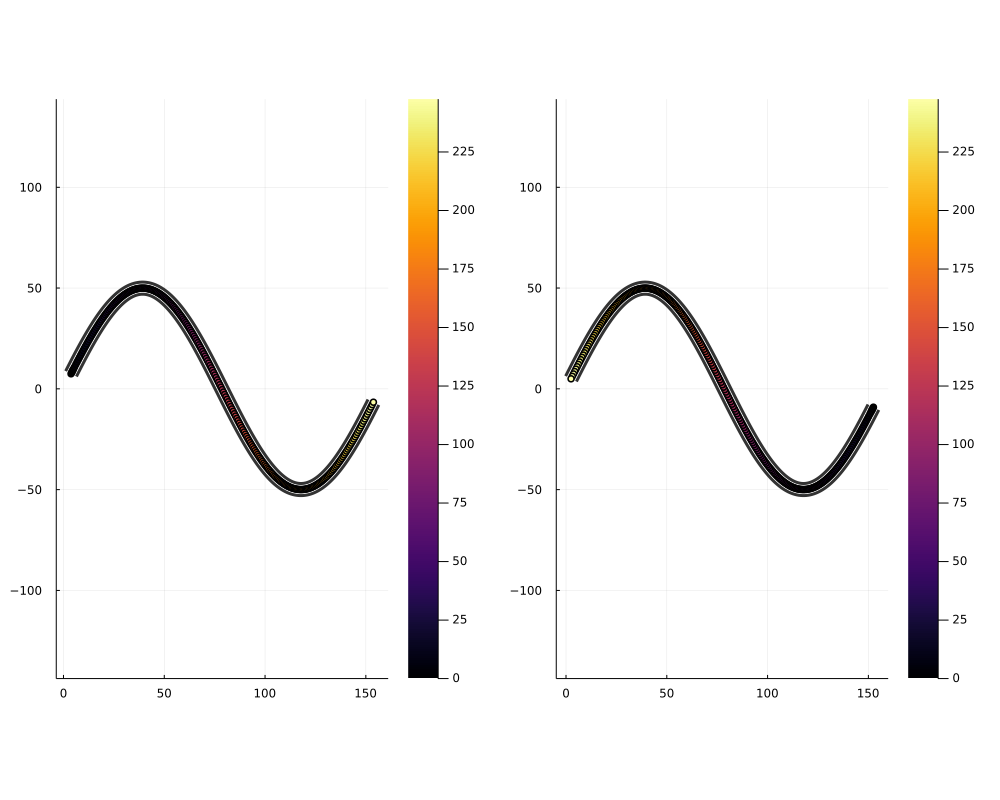

In [7]:
p = 0:.05:2π
x = p * 25
y = sin.(p) .* 50
xy = hcat(x, y)

destfile, reverse_npyfile, l = create_track(x, y, "sine")
p1 = showtrack(destfile; ms=4)
p2 = showtrack(reverse_npyfile; ms=4)
plot(p1, p2; size=(1000, 800))

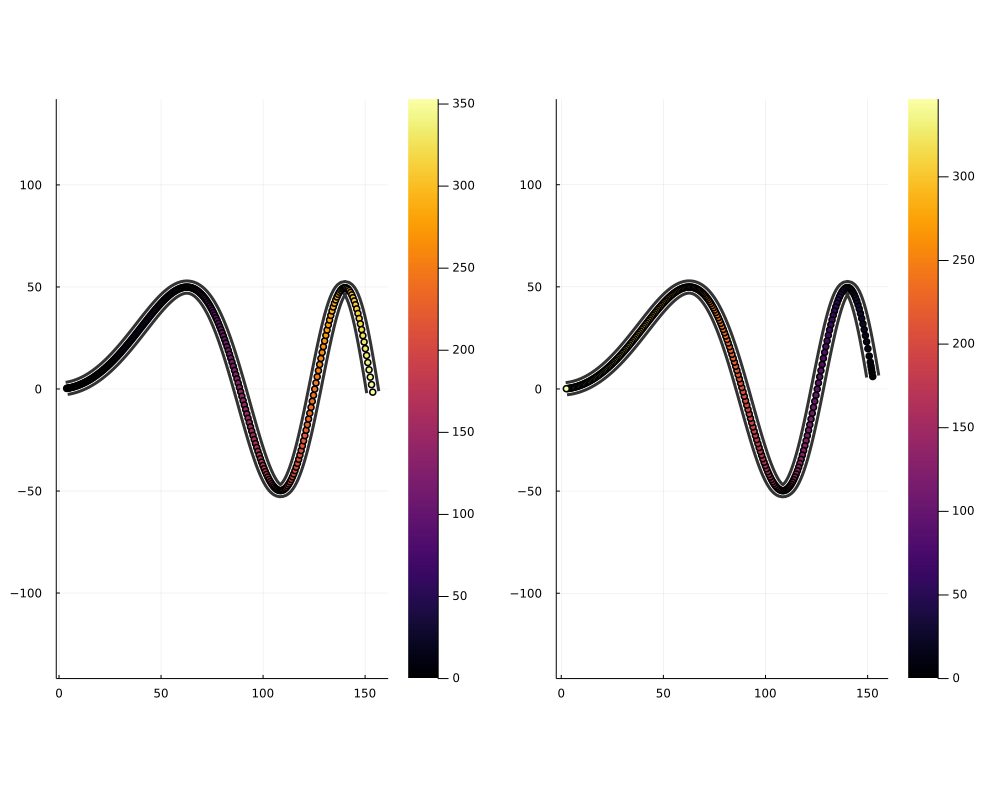

In [154]:
p = 0:.05:2π
x = p * 25
y = sin.(p .* (p ./ 4)) .* 50
xy = hcat(x, y)

destfile, reverse_npyfile, l = create_track(x, y, "sine_chirp")
p1 = showtrack(destfile; ms=4)
p2 = showtrack(reverse_npyfile; ms=4)
plot(p1, p2; size=(1000, 800))

## Cosine

@Info (Main.create_track):  Saving track at 
  │ 
  │ (String)  ▶  destfile = /Users/federicoclaudi/Documents/Github/LocomotionControl/analysis/RNN/tracks/cosine.npy 
  ╰──────────────────────────────────────────────── 
                      Tue, 24 May 2022 10:05:46 
@Info (Main.reversetrack):  Saving reversed track at 
  │ 
  │ (String)  ▶  destfile = /Users/federicoclaudi/Documents/Github/LocomotionControl/analysis/RNN/tracks/cosine_reversed.npy 
  ╰──────────────────────────────────────────────── 
                      Tue, 24 May 2022 10:05:46 


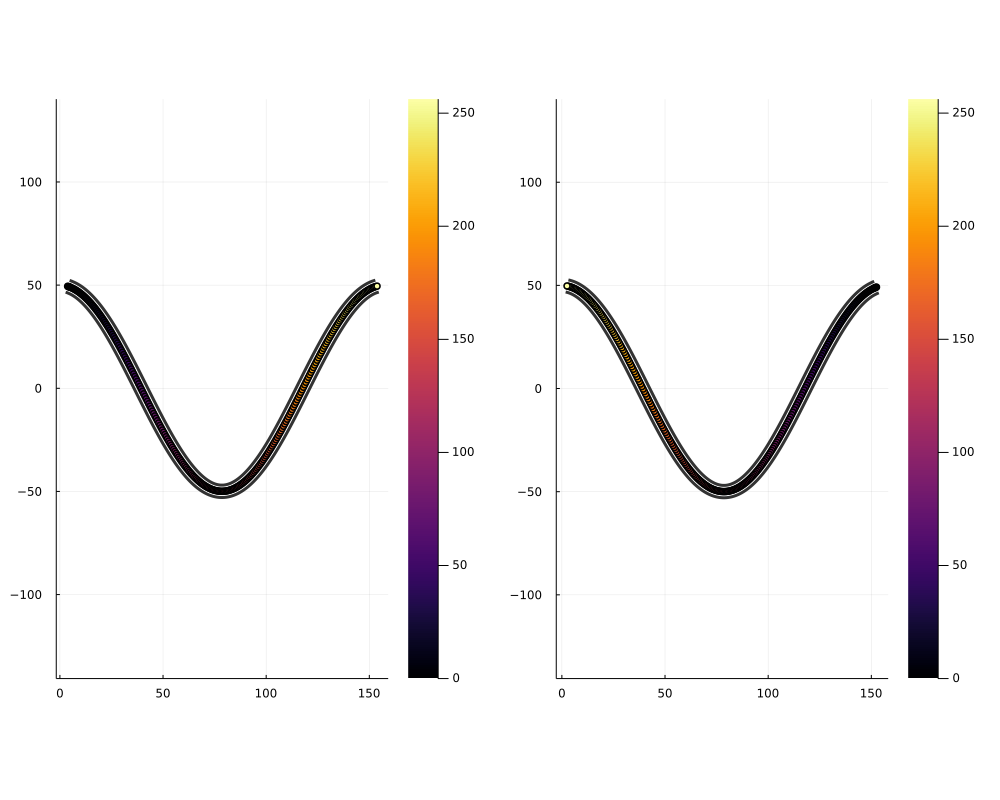

In [8]:
p = 0:.05:2π
x = p * 25
y = cos.(p) .* 50
xy = hcat(x, y)

destfile, reverse_npyfile, l = create_track(x, y, "cosine")
p1 = showtrack(destfile; ms=4)
p2 = showtrack(reverse_npyfile; ms=4)
plot(p1, p2; size=(1000, 800))

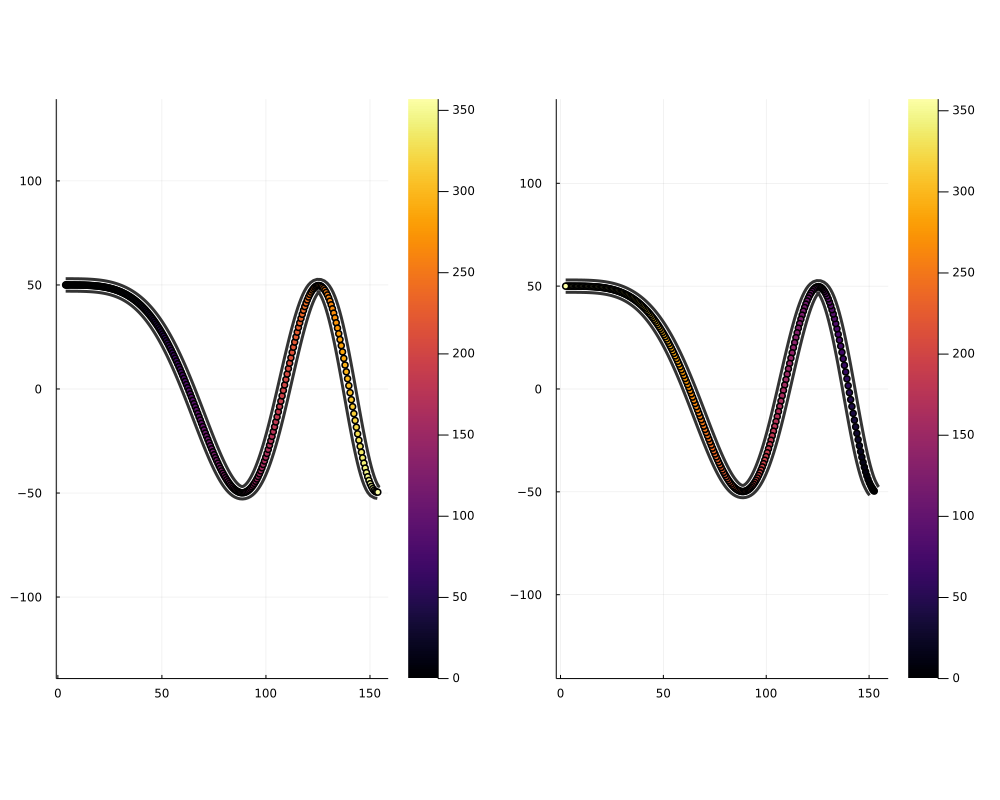

In [156]:
p = 0:.05:2π
x = p * 25
y = cos.(p .* (p ./ 4)) .* 50
xy = hcat(x, y)

destfile, reverse_npyfile, l = create_track(x, y, "cosine_chirp")
p1 = showtrack(destfile; ms=4)
p2 = showtrack(reverse_npyfile; ms=4)
plot(p1, p2; size=(1000, 800))

## Double curve

@Info (Main.create_track):  Saving track at 
  │ 
  │ (String)  ▶  destfile = /Users/federicoclaudi/Documents/Github/LocomotionControl/analysis/RNN/tracks/double_curve.npy 
  ╰──────────────────────────────────────────────── 
                      Tue, 24 May 2022 10:05:52 
@Info (Main.reversetrack):  Saving reversed track at 
  │ 
  │ (String)  ▶  destfile = /Users/federicoclaudi/Documents/Github/LocomotionControl/analysis/RNN/tracks/double_curve_reversed.npy 
  ╰──────────────────────────────────────────────── 
                      Tue, 24 May 2022 10:05:52 


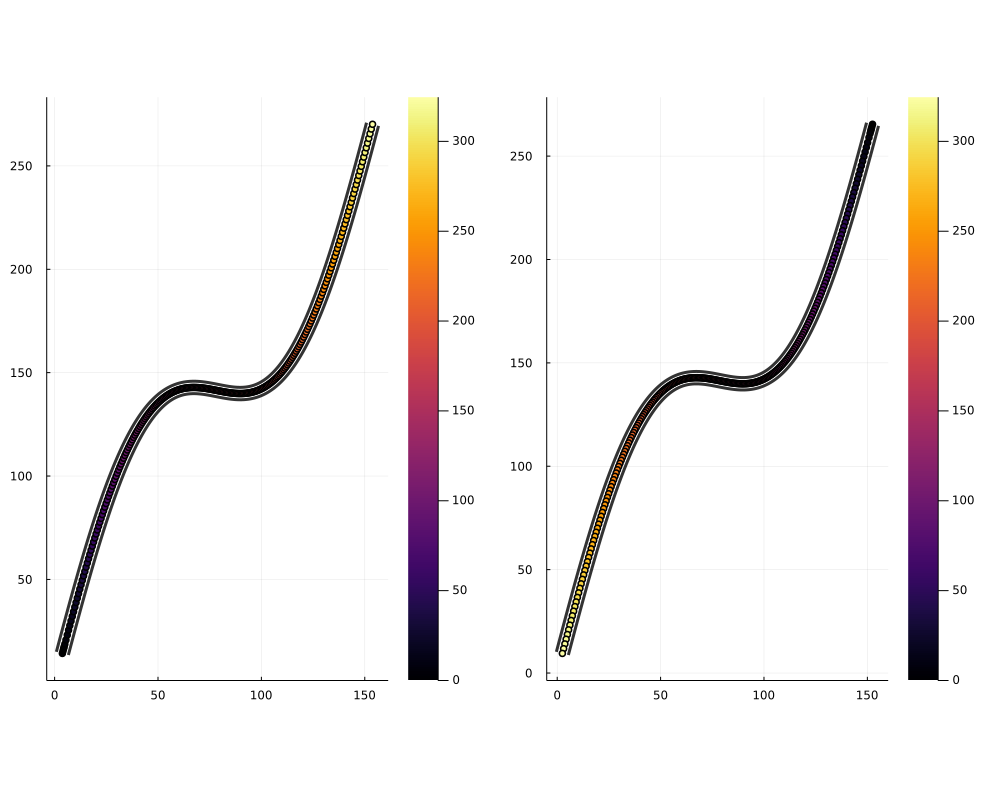

In [9]:
p = 0:.05:2π
x = p * 25
y = sin.(p) .* 50 .+ p * 45
xy = hcat(x, y)

destfile, reverse_npyfile, l = create_track(x, y, "double_curve")
p1 = showtrack(destfile)
p2 = showtrack(reverse_npyfile)
plot(p1, p2; size=(1000, 800))

## Squiggle

@Info (Main.create_track):  Saving track at 
  │ 
  │ (String)  ▶  destfile = /Users/federicoclaudi/Documents/Github/LocomotionControl/analysis/RNN/tracks/squiggle.npy 
  ╰──────────────────────────────────────────────── 
                      Tue, 24 May 2022 10:05:56 
@Info (Main.reversetrack):  Saving reversed track at 
  │ 
  │ (String)  ▶  destfile = /Users/federicoclaudi/Documents/Github/LocomotionControl/analysis/RNN/tracks/squiggle_reversed.npy 
  ╰──────────────────────────────────────────────── 
                      Tue, 24 May 2022 10:05:56 


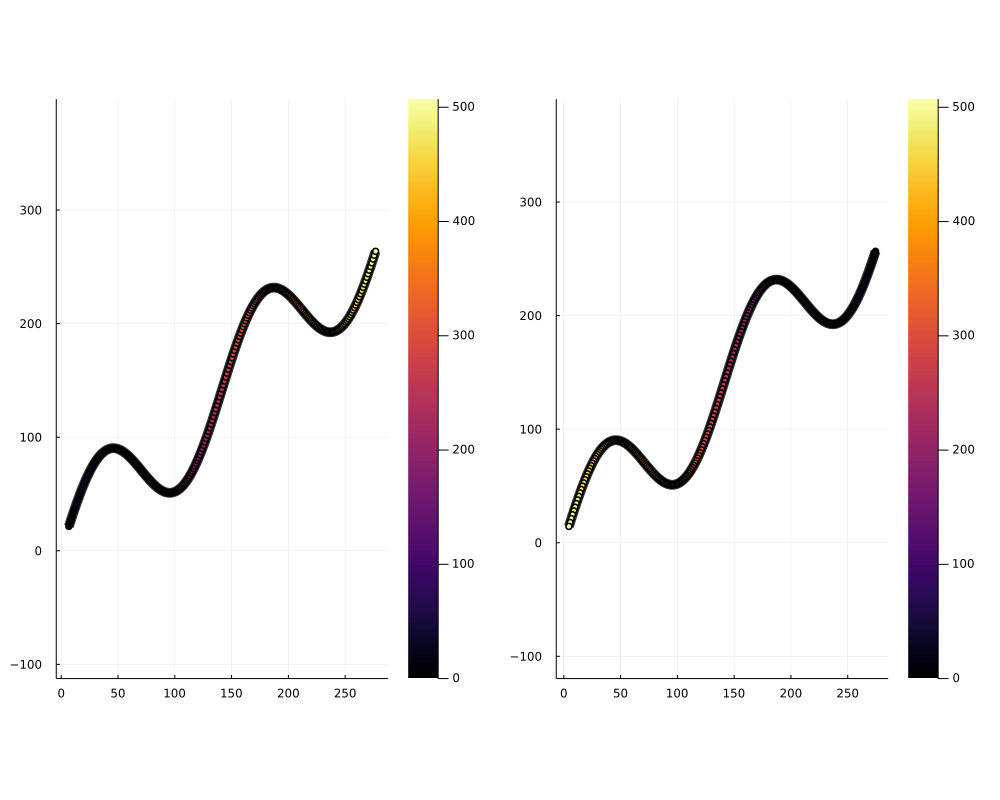

In [10]:
p = 0:.05:2π
x = p * 45
y = sin.(p .* 2) .* 50 .+ p * 45
xy = hcat(x, y)

destfile, reverse_npyfile, l = create_track(x, y, "squiggle")
p1 = showtrack(destfile)
p2 = showtrack(reverse_npyfile)
plot(p1, p2; size=(1000, 800))

## U turn

@Info (Main.create_track):  Saving track at 
  │ 
  │ (String)  ▶  destfile = /Users/federicoclaudi/Documents/Github/LocomotionControl/analysis/RNN/tracks/uturn.npy 
  ╰──────────────────────────────────────────────── 
                      Tue, 24 May 2022 10:06:00 
@Info (Main.reversetrack):  Saving reversed track at 
  │ 
  │ (String)  ▶  destfile = /Users/federicoclaudi/Documents/Github/LocomotionControl/analysis/RNN/tracks/uturn_reversed.npy 
  ╰──────────────────────────────────────────────── 
                      Tue, 24 May 2022 10:06:00 


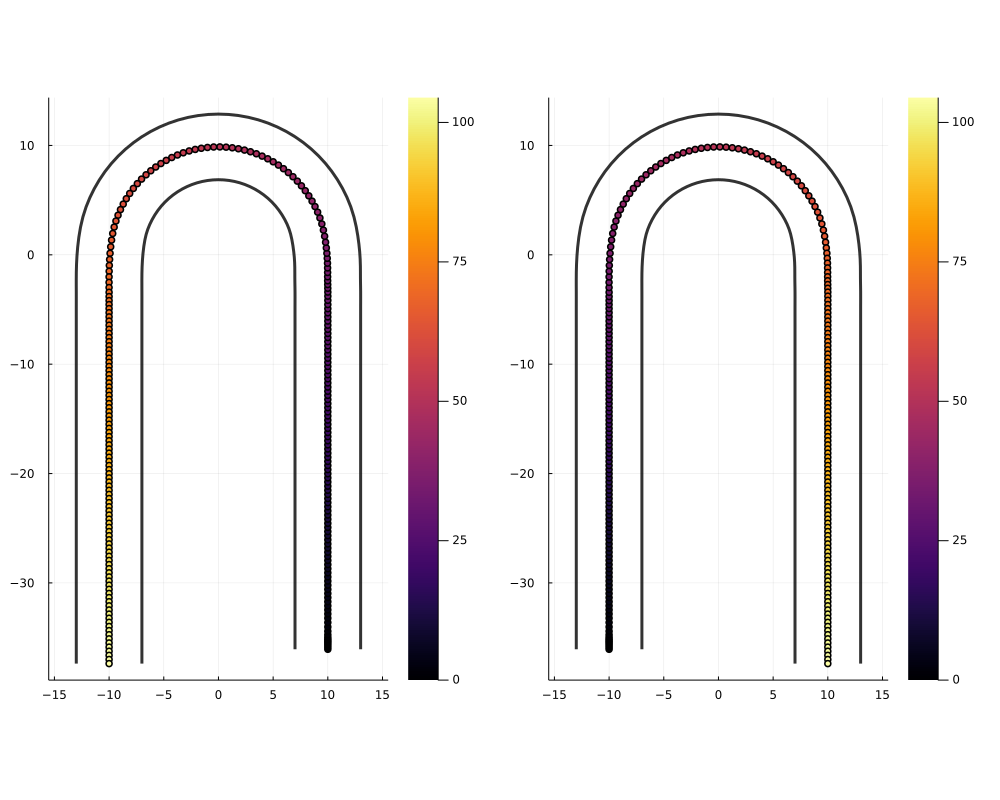

In [11]:
p = (-.1):.2:(π+.10)


x1 = ones(30) * 10
y1 = range(-40, stop=-2, length=30)

x2 = cos.(p) * 10
y2 = sin.(p) * 10

x3 = ones(30) * -10
y3 = range(-2, stop=-40, length=30)


x = vcat(x1, x2, x3)
y = vcat(y1, y2, y3)
xy = hcat(x, y)

destfile, reverse_npyfile, l = create_track(x, y, "uturn")
p1 = showtrack(destfile; ms=4)
p2 = showtrack(reverse_npyfile; ms=4)
plot(p1, p2; size=(1000, 800))